Smoothing and deriving using a Savitzky-Golay filter
====================================================

The Savitzky-Golay filter is a generalization of the moving average. Instead of taking the mean of the n points of a moving window, the Savitzky-Golay filter fits a polynomial over each window. It is a powerful filter for data that is heavily quantized, particularly if we want to derivate these data. In this tutorial, we will see how to apply Savitzky-Golay filters on TimeSeries data, using the [filters.savgol()](../api/kineticstoolkit.filters.savgol.rst) function.

In [1]:
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

We will first load some noisy data:

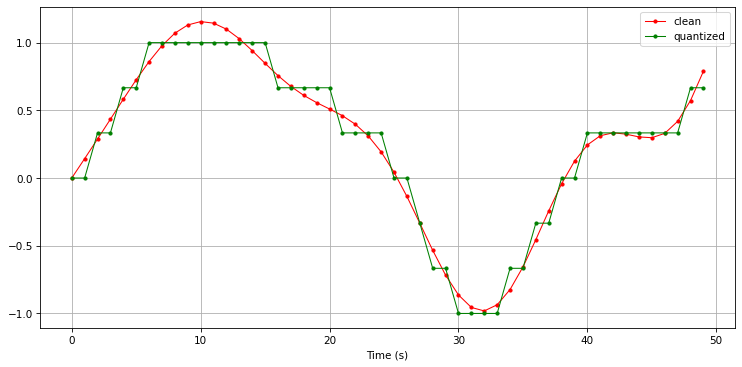

In [2]:
ts = ktk.load(
    ktk.config.root_folder + '/data/filters/sample_noises.ktk.zip')

# Plot it
ts.plot(['clean', 'quantized'], marker='.')
plt.grid(True)
plt.tight_layout()

Smoothing using a Savitzky-Golay filter
---------------------------------------

Let's try to smooth the non-derived signal using a second-order Savitzky-Golay filter with a window length of 7.

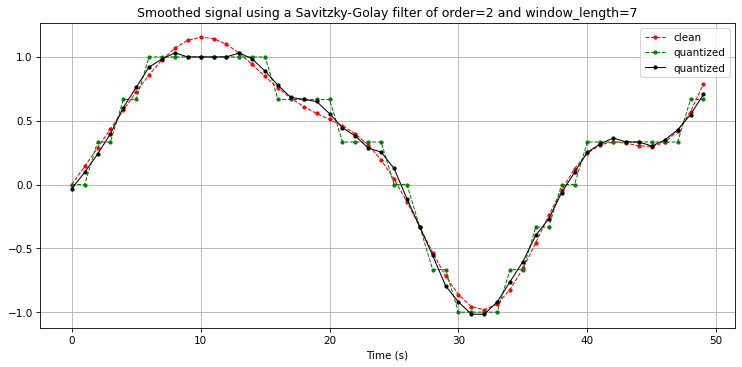

In [3]:
filtered = ktk.filters.savgol(ts, poly_order=2, window_length=7)

ts.plot(['clean', 'quantized'], marker='.', linestyle='--')
filtered.plot(['quantized'], marker='.', color='k')

plt.title('Smoothed signal using a Savitzky-Golay filter of order=2 and window_length=7')
plt.grid(True)
plt.tight_layout()

Deriving using a Savitzky-Golay filter
--------------------------------------

This sort of signal that suffers from bad resolution is very difficult to derivate because it is filled with fast-changing plateaus:

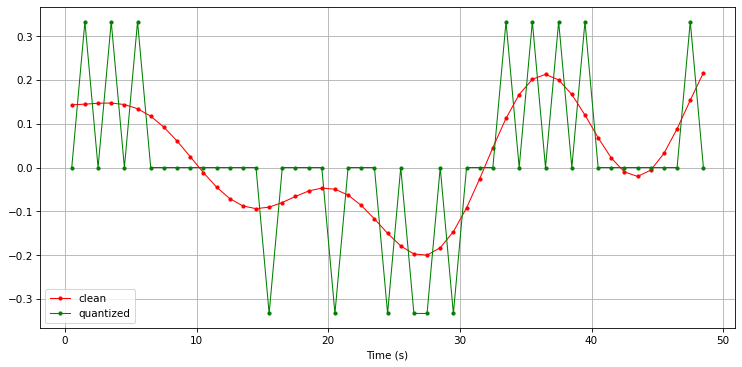

In [4]:
# Try to derivate
derivate = ktk.filters.deriv(ts)

# Plot it
derivate.plot(['clean', 'quantized'], marker='.')
plt.grid(True)
plt.tight_layout()

Since the Savitzky-Golay filter fits a polynom instead of just smoothing the signal, then the derivative of the filtered signal is automatically given by deriving the polynom instead of the signal. Let's see the result with the same filtering conditions:

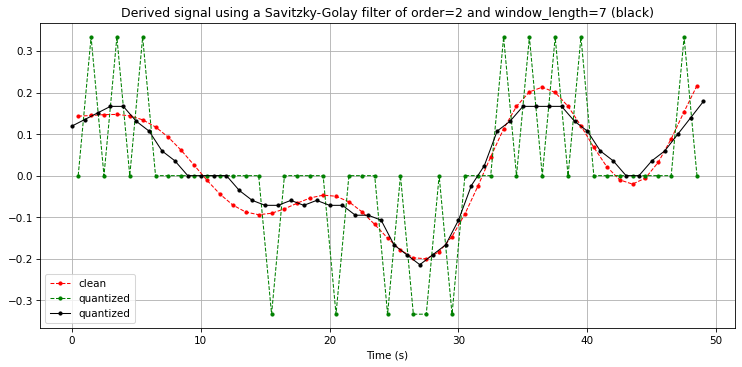

In [5]:
# Filter and derivate
derivate_savgol = ktk.filters.savgol(ts, poly_order=2, window_length=7, deriv=1)

# Plot it
derivate.plot(['clean', 'quantized'], marker='.', linestyle='--')
derivate_savgol.plot('quantized', marker='.', color='k')

plt.title('Derived signal using a Savitzky-Golay filter of order=2 and window_length=7 (black)')
plt.grid(True)
plt.tight_layout()

As observed, the derivative of the highly-quantized signal is very similar to the derivative of the clean signal.